In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [139]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [147]:
# set configuration
sample_size = 1000
nr_sample = 20
nr_moments = 10

# classificatio
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

## Bounded distributions

In [92]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [93]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,dist
0,0.494175,0.124499,-0.000363,0.023306,-0.000051,0.004828,-0.000003,0.001049,0.000002,0.000234,0.000001,0.000053,5.744372e-07,0.000012,2.070039e-07,arcsine
1,0.488927,0.130996,0.002909,0.024616,0.001100,0.005148,0.000344,0.001135,0.000101,0.000258,0.000028,0.000060,7.881897e-06,0.000014,2.151312e-06,arcsine
2,0.504626,0.127649,0.000492,0.023769,0.000118,0.004904,0.000014,0.001063,-0.000002,0.000237,-0.000002,0.000054,-9.251950e-07,0.000012,-3.258502e-07,arcsine


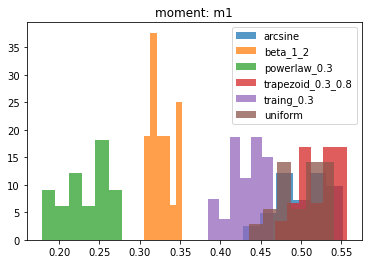

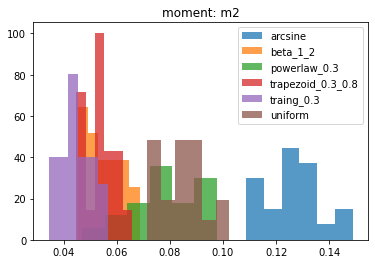

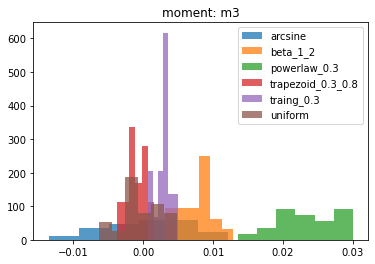

In [13]:
dem.get_histogram_of_moments(moments_df)

In [ ]:
# setting values for cross validation
sample_size_list = [5, 10, 25, 50, 100, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))

### svm

In [84]:
acc_svm, std_svm = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 1)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

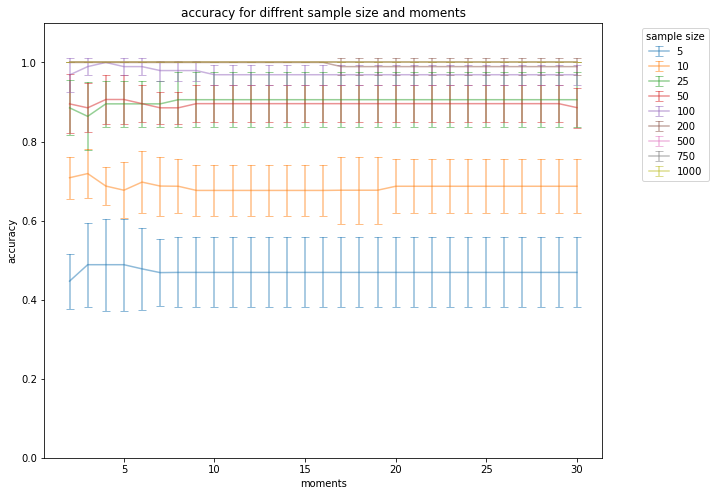

In [87]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_svm, std_svm, errbar=1)

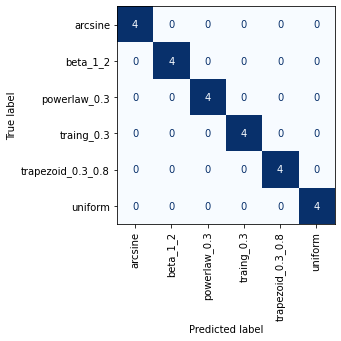

array([1., 1., 1., 1., 1.])

In [94]:
cm.svm_model(moments_df, test_size, cv, plot=1)

### Logistic Regression

In [89]:
acc_rr, std_rr = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 2)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

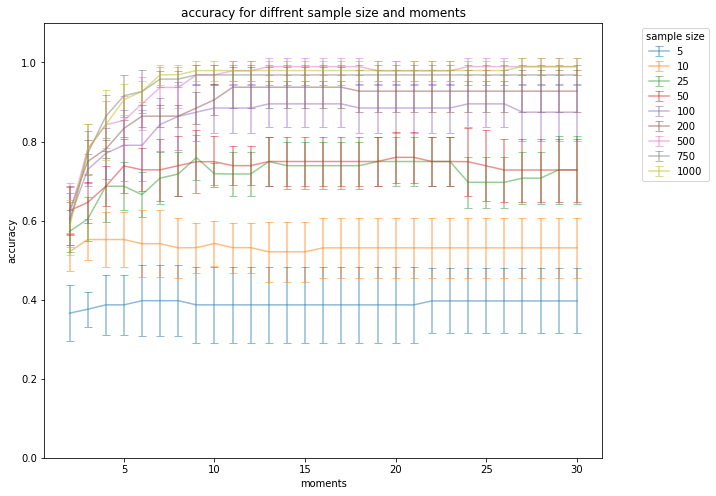

In [90]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_rr, std_rr, errbar=1)

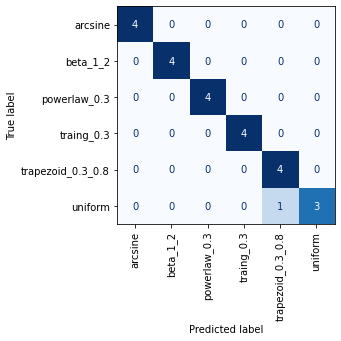

array([1.        , 1.        , 1.        , 1.        , 0.94736842])

In [95]:
cm.rr_model(moments_df, 0.2, 5, plot=1)

In [ ]:
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(acc)):
        plt.plot(step_size_list, acc[i], label=str(num_steps_list[i]), alpha = 0.5)
        plt.title('accuracy for different step size and number of steps, sample size =%d' % sample_config[0])
        plt.xlabel('step size')
        plt.ylabel('accuracy')
        
        pos = ax.get_position()
        ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='number of steps')
    plt.show()

## Heavytail distributions

In [148]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [149]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,dist
0,0.906323,0.701042,1.198702,4.458962,16.536132,69.161561,304.750287,1397.749692,6.585472e+03,3.163795e+04,cauchy
1,0.954382,0.849383,2.335148,15.789452,128.310374,1177.439195,11326.681809,111380.750493,1.107291e+06,1.107321e+07,cauchy
2,0.892982,0.745894,1.317818,4.790895,17.551839,73.204651,326.456891,1537.009258,7.528564e+03,3.800189e+04,cauchy


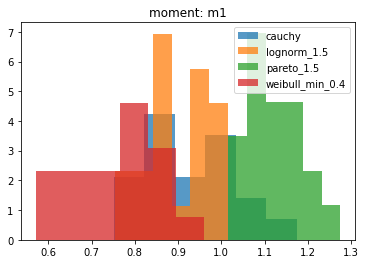

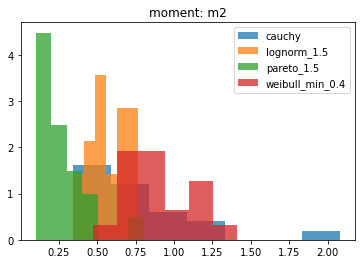

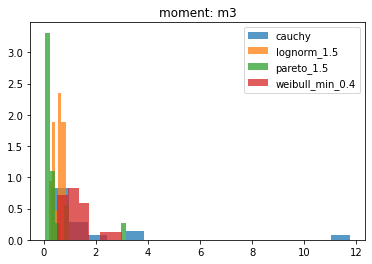

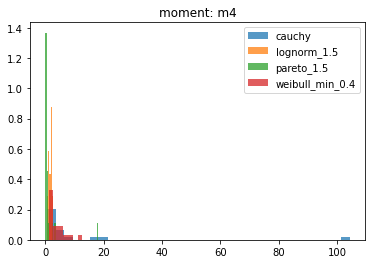

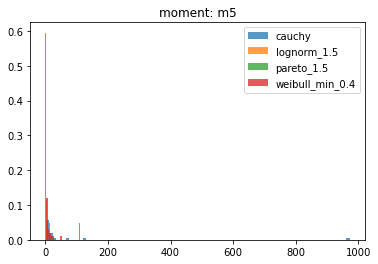

In [146]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [143]:
acc_ht, std_ht = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, heavytail_dists, 20, cv_config, 1, transform = True)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

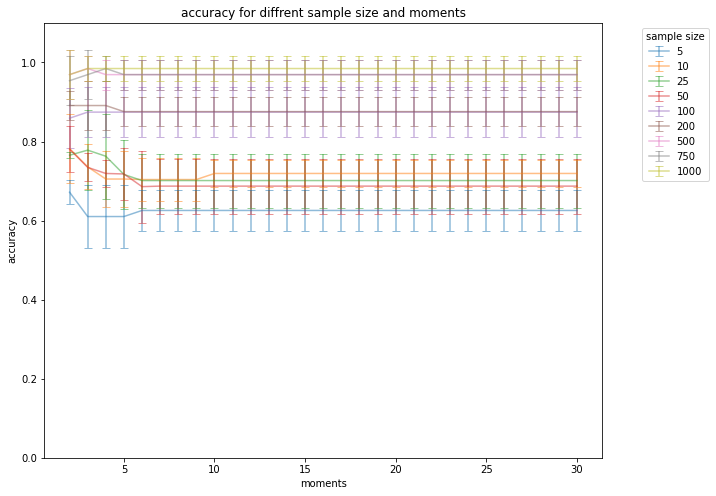

In [144]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_ht, std_ht, errbar=1)

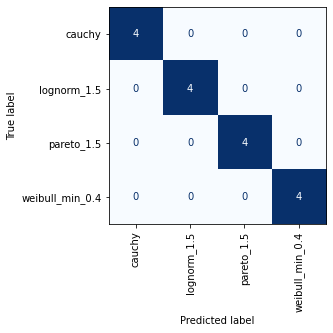

array([1.        , 1.        , 1.        , 0.92307692, 1.        ])

In [150]:
cm.svm_model(moments_df, test_size, cv, plot=1)

### Logistic Regression

In [141]:
acc_rr_ht, std_rr_ht = cm.cv_moments_sample_size(sample_size_list, 
                                                 nr_moments_list, 
                                                 heavytail_dists, 
                                                 20, 
                                                 cv_config, 
                                                 2, 
                                                 transform= True)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

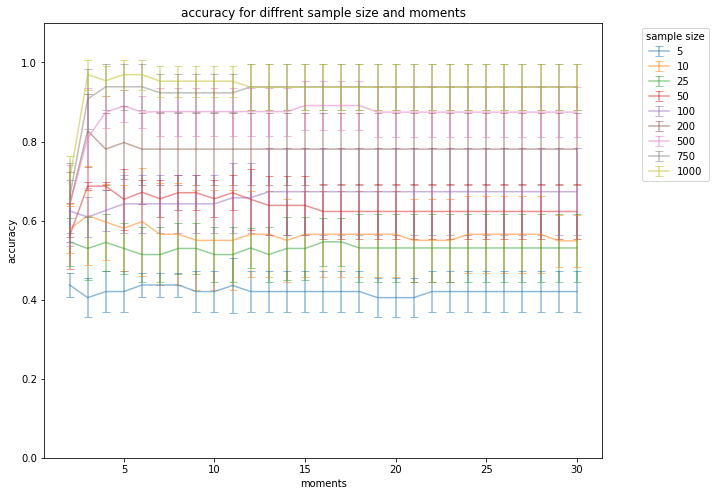

In [142]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_rr_ht, std_rr_ht, errbar=1)

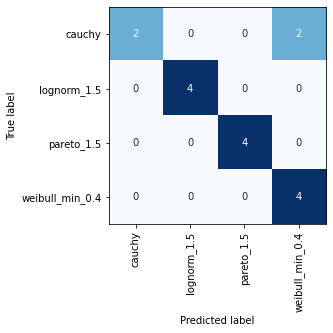

array([1.        , 0.92307692, 1.        , 0.92307692, 0.91666667])

In [152]:
cm.rr_model(moments_df, test_size, cv, plot=1)